# Tenant Churn Model to predict the tenant turnover with the past data

- By: [Kathirvel Kumararaja]()

## Problem Statement

![title](../assets/churn.jpeg)  


Tenant Churn or Tenant turnover is one of the challenges if you are managing multiple properties with diversified tenants. Modeling tenant churn is a classical application of data science. To put in a simple language a churn model is a classification model that given a set of predictors, or input variables, predicts the status of a tenant. Our churn model will predict, if a tenant rents a unit, the probability that tenant will leave within a given time frame, for example 1 year. Armed with this knowledge a property manager can better understand how the tenant mix will change over time and which units are likely to become available soon. This will enable managers to proactively target the high churn candidates and provide incentives for them to extend their contract. In addition, the model can highlight which units likely will need to be filled in the future, so that the vacancy period of a unit can be reduced.

- This is a classsification model.

- We will be evaluating our model based on __Accuracy.__ 

## Executive Summary

To address the challenge of finding the comprehensive data for our modeling, our first strategy is to finalize a good source of data which will help us in understanding the tenant Move-In Move-out behavior. While most of us think that Residential and Commercial rentals have mostly to do with capital investment the actual profit that a typical Property Manager makes is just between 8% to 9%. 

Soccer as the most popular sports, data told us a different story. Cricket is played around 50 countries with 2.5 billion fans while football is played in over 200 countries with 3.5 billion fans. In other words per country there are 50 million cricket fans compared to 17.5 million football fans. It was a challenge to get a correct key word for the amount of data that we needed. We started with specific clubs of these sports and generalized to get enough data. 

Another challenge we were having was getting enough data (our target was close to 2000 records in each subreddit). I had to change the day window to attain this objective. Once I adjusted the day window to 15 and appropriate fequency I was able to collect enough data for training our models.

After extracting the blog post data next decision we had to make was what column or columns needs to be my X. We were inclined to use 'Title' and 'Self text' consdering the relevance of the contents. But after reviewing the shape of data and Null values we have decided to use only 'Title' as 'Self Text' was not adding much value in training my model.  

EDA helped me set up a preprocessing plan for our model. For preprocessing, I had created a fucntion that used regex, lemmatizatizer which removed punctuation and stopwords. For modeling, I used  TFIDF and Count vetorizers. They brought context of word choices into play, which will give us a better understanding of the group of words used in a reddit blog post about the sports we are analyzing.
 
Machines had no problem understanding the blog posts, after using vectorizers.

__Data Dictionary__

|Tenant Traffic|Type|Dataset|Description|
|---|---|---|---|
|Unit|float|Tenant_traffic|This field represents Unique identification of rental units| 
|Tcode|int|Tenant_traffic|Represent the read/write score| 
|Rent|int|Tenant_traffic|This field represent the Rent of the Unit| 
|Base|int|Tenant_traffic|This field represent the Mean Late fee calculation condition| 
|Criteria|float|Tenant_traffic|This field represent the % of participation| 
|Grace_Period|int|Tenant_traffic|Represent the read/write score| 
|Legal_Rent|int|Tenant_traffic|This field represent the Legal Rent a Tenant can collect| 
|Deposit|int|Tenant_traffic|This field represent the Deposit held by the landlord| 
|From|float|Tenant_traffic|This field represent the Lease Starting Month| 
|To|int|Tenant_traffic|Represent the the Lease Ending Month| 
|Move_In|int|Tenant_traffic|This field represent the Date Tenant Moved In| 
|Move_Out|int|Tenant_traffic|This field represent the Date Tenant Moved Out| 
|Months_Occupied|int|Tenant_traffic|This field represent the number of months tenant| 
|Last_Renewal|int|Tenant_traffic|This field represent the Last Renewal date| 
|Tenant_Status|float|Tenant_traffic|This field represent the status Current or Pat| 
|Roommates-Y|int|Tenant_traffic|Represent the read/write score| 
|ACH-Y|int|Tenant_traffic|This field signed up for ACH payments| 

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import time
import requests

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from nltk.stem import PorterStemmer
import datetime as dt
import time

from sklearn.metrics import roc_auc_score

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import regex as re
import nltk
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings("ignore") 
#importing stats model for GLM
import warnings

warnings.filterwarnings("ignore") # Shhhh

import statsmodels.api as sm
from sklearn.datasets import make_regression, make_multilabel_classification

#importing GaussianNB

from sklearn.naive_bayes import GaussianNB
from sklearn.base import TransformerMixin # this allows us to create a custom transformer

%matplotlib inline



import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Lasso, ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense

import pandas as pd

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



/Users/kraja/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
#Read the data for resident info
#df = pd.read_csv("../datasets/TenantInfo_V1.csv")
df = pd.read_csv("../datasets/TenantInfo_Final.csv")

In [3]:
df.head()

Unit     TCode      Rent  Base        Criteria  Grace_Period Legal_Rent  \
0  1-1A  t0007336  1,791.00   5.0  % Monthly Rent           5.0   3,525.59   
1  1-1A  t0010441  1,720.00  50.0     Flat Amount           5.0   3,525.59   
2  1-1C  t0008389  1,889.00   5.0  % Monthly Rent           5.0   4,569.38   
3  1-1C  t0013455  1,829.00  50.0     Flat Amount           5.0   4,569.38   
4  1-1E  t0014677      0.00   5.0    % Owed-month           5.0   4,092.53   

     Deposit       From         To    Move_In   Move_Out  Months_Occupied  \
0      0.00    10/31/15   10/31/17   10/31/15   12/31/16               14   
1  3,439.60    03/01/19   02/28/21   02/24/17        NaN            -1426   
2      0.00    03/31/16   03/31/18   03/31/16    3/31/18               24   
3  4,569.38    05/29/18   05/31/20   05/29/18        NaN            -1442   
4      0.00    01/31/19   01/31/21   01/31/19        NaN            -1450   

  Last_Renewal Tenant_Status Roommates-Y ACH-Y  
0          NaN          Past           Y     N  
1     01/25/19       Current           Y     Y  
2          NaN          Past           Y     N  
3          NaN       Current           Y     Y  
4          NaN     Applicant           N     N

In [4]:
# Our Modeling data frame will have only data relate to past tenants.
df_past = df[df['Tenant_Status'] == 'Past']

In [5]:
df_current = df[df['Tenant_Status'] == 'Current']

In [6]:
df_current.shape

(2031, 17)

In [7]:
df_past.shape

(1019, 17)

In [8]:
# combining both the dataframes using concatenate
combined_df = pd.concat(objs = [df_past, df_current],
                    axis = 0)

In [9]:
combined_df.shape

(3050, 17)

In [10]:
combined_df.columns

Index(['Unit', 'TCode', 'Rent', 'Base', 'Criteria', 'Grace_Period',
       'Legal_Rent', 'Deposit', 'From', 'To', 'Move_In', 'Move_Out',
       'Months_Occupied', 'Last_Renewal', 'Tenant_Status', 'Roommates-Y',
       'ACH-Y'],
      dtype='object')

In [11]:
combined_df.isnull().sum()

Unit                  0
TCode                 0
Rent                  0
Base                 57
Criteria              0
Grace_Period          0
Legal_Rent          436
Deposit              82
From                  1
To                  353
Move_In               0
Move_Out           2042
Months_Occupied       0
Last_Renewal       1985
Tenant_Status         0
Roommates-Y           0
ACH-Y                 0
dtype: int64

In [12]:
#df_past.fillna(0, inplace=True)

In [13]:
df_past.isnull().sum().sum()

949

In [14]:
df_past.columns

Index(['Unit', 'TCode', 'Rent', 'Base', 'Criteria', 'Grace_Period',
       'Legal_Rent', 'Deposit', 'From', 'To', 'Move_In', 'Move_Out',
       'Months_Occupied', 'Last_Renewal', 'Tenant_Status', 'Roommates-Y',
       'ACH-Y'],
      dtype='object')

## Data Cleaning and EDA

__We have two type of data.__ 

 - Past tenant data :  pertaining to the tenants who already moved out of their residntial units.
 - Current tenant data: pertaining to the tenants who are still living in their residntial units.

Text(0.5, 1.0, 'Missing Values - Tenant Traffic Data')

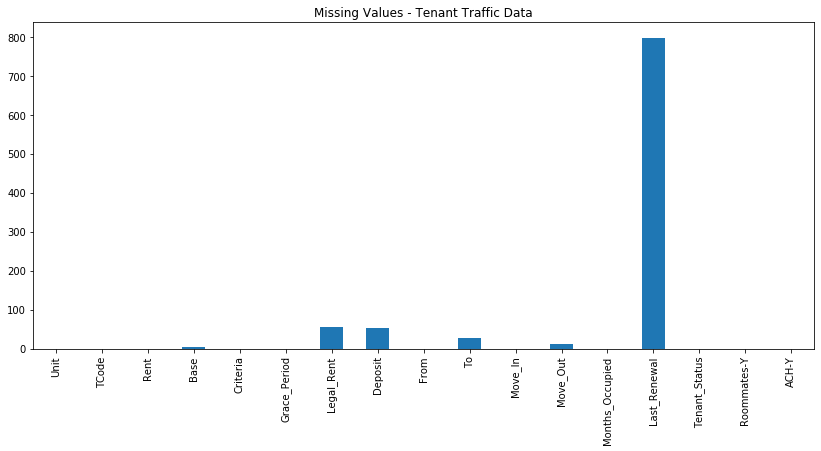

In [15]:
#Creating a Bar chart for the missing values
plt.figure(figsize = (14, 6))
df_past.isnull().sum().plot(kind='bar');
plt.title('Missing Values - Tenant Traffic Data')

__Missing Value Intrepretation__

The above graph of missing value shows that the Last Renewal Date is empty. This is reasonable as these tenants have already moved out.

In [16]:
#checking the datatype of the imported data
df_past.dtypes

Unit                object
TCode               object
Rent                object
Base               float64
Criteria            object
Grace_Period       float64
Legal_Rent          object
Deposit             object
From                object
To                  object
Move_In             object
Move_Out            object
Months_Occupied      int64
Last_Renewal        object
Tenant_Status       object
Roommates-Y         object
ACH-Y               object
dtype: object

In [17]:
# Correcting the Data types of Date Fields.
columns=['From', 'To', 'Move_In', 'Move_Out']
for i in columns:
    df_past[i]=pd.to_datetime(df_past[i])

In [18]:
# Correcting the Data types of Date Fields in combined_df
columns=['From', 'To', 'Move_In', 'Move_Out']
for i in columns:
    combined_df[i]=pd.to_datetime(df_past[i])

In [19]:
# Correcting the Data types from string to float in combined_df
columns=['Rent', 'Legal_Rent']
for i in columns:
    combined_df[i]=combined_df[i].str.replace(',', '').astype(float)

In [20]:
# Correcting the Data types from string to float in df_past
columns=['Rent', 'Legal_Rent']
for i in columns:
    df_past[i]=df_past[i].str.replace(',', '').astype(float)

In [21]:
combined_df.fillna(0, inplace=True)

In [22]:
combined_df["Tenant_Status"].value_counts()

Current    2031
Past       1019
Name: Tenant_Status, dtype: int64

In [23]:
#Mapping if the tenants has Churned (Past)  to binary '1', '0'
combined_df['Tenant_Status'] = df_past['Tenant_Status'].map({'Past':1, 'Current':0})

In [24]:
combined_df['Deposit'] = combined_df['Deposit'].str.replace('(', '-')

In [25]:
combined_df['Deposit'] = combined_df['Deposit'].str.replace(')', '')

In [26]:
combined_df['Deposit'] = combined_df['Deposit'].str.replace(',', '').astype(float)

In [27]:
df_past['Deposit'] = df_past['Deposit'].str.replace('(', '-')

In [28]:
df_past['Deposit'] = df_past['Deposit'].str.replace(')', '')

In [29]:
df_past['Deposit'] = df_past['Deposit'].str.replace(',', '').astype(float)

In [30]:
# removing white spaces in the object type fields
df_past = df_past.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [31]:
#Mapping the ACH tenants (string) to binary '1', '0'
df_past['ACH-Y'] = df_past['ACH-Y'].map({'Y': 1, 'N': 0})

In [32]:
#Mapping if the tenants has roomates (string) to binary '1', '0'
df_past['Roommates-Y'] = df_past['Roommates-Y'].map({'Y':1, 'N':0})

In [33]:
#Mapping the ACH tenants (string) to binary '1', '0'
combined_df['ACH-Y'] = combined_df['ACH-Y'].map({'Y': 1, 'N': 0})

In [34]:
#Mapping if the tenants has roomates (string) to binary '1', '0'
combined_df['Roommates-Y'] = combined_df['Roommates-Y'].map({'Y':1, 'N':0})

___Understanding the trend of tenant traffic.___


__Daywise Move out traffic__

In [35]:
df_past['Moveout_day'] = df_past['Move_Out'].dt.dayofweek
df_past['Moveout_day'].unique()

array([ 5.,  1.,  4.,  2.,  3.,  0., nan,  6.])

In [86]:
# assigning key value to the weekdays from Monday thru Friday using .map method.
df_past['weekday'] = df_past['Moveout_day'].map({1.: 'Monday', 
                               2.: 'Tuesday',
                               3.: 'Wednesday',
                               4.: 'Thursday',
                               5.: 'Friday',
                               6.: 'Saturday',
                               0.: 'Sunday'
                               })
df_past['weekday'].unique()

array(['Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday', 'Sunday',
       nan, 'Saturday'], dtype=object)

In [87]:
df_past['weekday'].value_counts()

Sunday       189
Monday       177
Thursday     175
Tuesday      171
Wednesday    153
Friday        98
Saturday      45
Name: weekday, dtype: int64

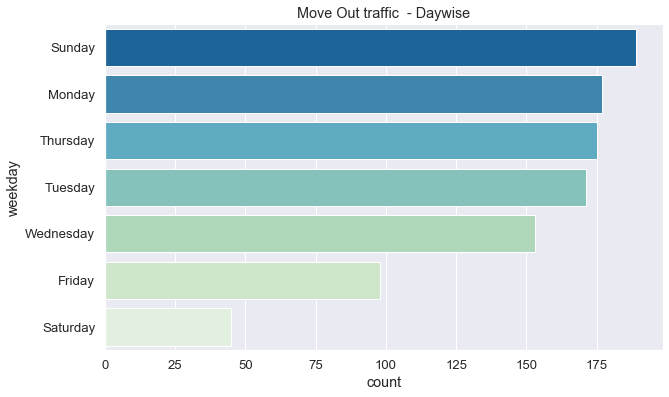

In [88]:
#Move Out traffic - Day wise
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
plt.title('Move Out traffic  - Daywise')
sns.countplot(data=df_past,
              y='weekday', 
              order = df_past['weekday'].value_counts().index,
              palette="GnBu_r");

__Daywise Moveout Traffic Graph Intrepretation__

The above graph of Daywise Moveout Traffic Graph shows that most of the traffic happens mostly during Sunday & Mondays.

__Monthwise Move out traffic__

In [39]:
df_past['Moveout_month'] = df_past['Move_Out'].dt.month
df_past['Moveout_month'].unique()

array([12.,  3.,  5.,  8., 11., 10.,  1.,  4.,  7.,  2.,  6.,  9., nan])

In [40]:
# assigning key value to the weekdays from Monday thru Friday using .map method.
df_past['year_month'] = df_past['Moveout_month'].map({1.: 'Jan', 
                               2.: 'Feb',
                               3.: 'Mar',
                               4.: 'Apr',
                               5.: 'May',
                               6.: 'Jun',
                               7.: 'Jul',
                               8.: 'Aug',
                               9.: 'Sep',
                               10.: 'Oct',
                               11.: 'Nov',
                               12.: 'Dec'

                               })
df_past['year_month'].unique()

array(['Dec', 'Mar', 'May', 'Aug', 'Nov', 'Oct', 'Jan', 'Apr', 'Jul',
       'Feb', 'Jun', 'Sep', nan], dtype=object)

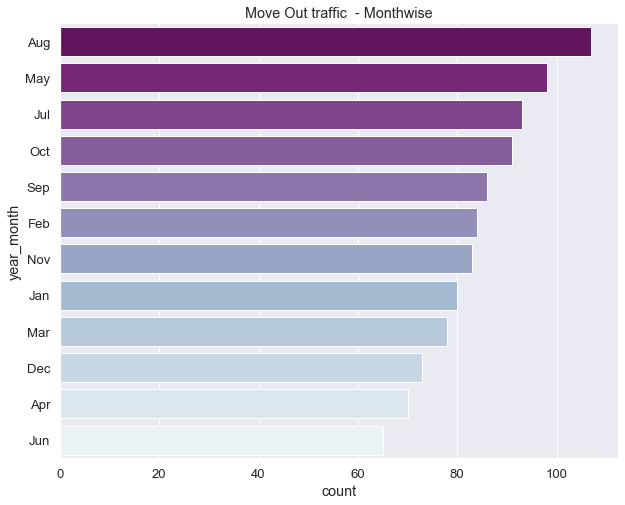

In [93]:
#Move Out traffic - Month wise
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
plt.title('Move Out traffic  - Monthwise')
sns.countplot(data=df_past,
              y='year_month', 
              order = df_past['year_month'].value_counts().index,
              palette="BuPu_r");

__Monthwise Moveout Traffic Graph Intrepretation__

The above graph of Monthwise Moveout Traffic Graph shows that most of the traffic happens during   Summer months (May, Jul, Aug, Oct). I have also noticed noticed that the traffic is more jusyt after the begining of School Holidays and picks up just before School start month.

In [42]:
filtered_df = df_past[df_past['Move_Out'].notnull()]

In [43]:
filtered_df.dropna(inplace=True)

__Preprocessing__

In [44]:
# Train test split
X = filtered_df[['Rent', 'Legal_Rent', 'Roommates-Y', 'Deposit']]
y = filtered_df['Months_Occupied']

In [45]:
filtered_df.head()

Unit     TCode    Rent  Base        Criteria  Grace_Period  Legal_Rent  \
12  1-2F  t0008667  1815.0   5.0  % Monthly Rent           5.0     3893.10   
21  1-4C  t0008216  1889.0   5.0  % Monthly Rent           5.0     5381.15   
31  1-5D  t0009998  1499.0  50.0     Flat Amount           5.0     2100.07   
47  1-L1  t0008198  1575.0   5.0    % Owed-month           5.0     2560.93   
74  4-1R  t0005773   960.0   0.0    % Owed-month           0.0     2842.13   

    Deposit       From         To  ...   Move_Out Months_Occupied  \
12  2549.00 2018-05-01 2020-04-30  ... 2018-05-01              24   
21     0.00 2018-04-01 2020-03-31  ... 2018-08-31              30   
31  2069.03 2018-11-01 2019-10-31  ... 2019-10-05              36   
47     0.00 2018-05-01 2019-04-30  ... 2019-04-30              37   
74  1454.00 2016-02-01 2017-01-31  ... 2016-03-31              15   

    Last_Renewal Tenant_Status Roommates-Y  ACH-Y  Moveout_day    weekday  \
12      04/09/18          Past           1      0          1.0     Monday   
21      03/23/18          Past           1      0          4.0   Thursday   
31      10/08/18          Past           1      0          5.0     Friday   
47      04/16/18          Past           1      0          1.0     Monday   
74      01/14/16          Past           0      0          3.0  Wednesday   

   Moveout_month  year_month  
12           5.0         May  
21           8.0         Aug  
31          10.0         Oct  
47           4.0         Apr  
74           3.0         Mar  

[5 rows x 21 columns]

## Modeling 

__Baseline Model__

In [46]:
combined_df.fillna(0, inplace=True)

In [47]:
combined_df['Tenant_Status'].value_counts(normalize = True)

0.0    0.665902
1.0    0.334098
Name: Tenant_Status, dtype: float64

### Generalized Linear Mode

In [48]:
# adding y-intercept

X = sm.add_constant(X)

glm_gamma = sm.GLM(y,
                  X,
                  family = sm.families.Gamma(link = sm.families.links.log))

# Fit
fitted_glm_gamma = glm_gamma.fit()


# Generating summary of model.
fitted_glm_gamma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Months_Occupied   No. Observations:                  171
Model:                            GLM   Df Residuals:                      166
Model Family:                   Gamma   Df Model:                            4
Link Function:                    log   Scale:                         0.11667
Method:                          IRLS   Log-Likelihood:                -647.66
Date:                Wed, 04 Mar 2020   Deviance:                       21.272
Time:                        16:45:49   Pearson chi2:                     19.4
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.2776      0.085     38.498      0.000       3.111       3.444
Rent            0.0002    5.2e-05      3.395      0.001    7.46e-05       0.000
Legal_Rent   -4.69e-05   2.32e-05     -2.019      0.043   -9.24e-05   -1.38e-06
Roommates-Y     0.0954      0.058      1.640      0.101      -0.019       0.209
Deposit     -7.373e-06   2.03e-05     -0.364      0.716   -4.71e-05    3.24e-05
===============================================================================
"""

In [49]:
# checking if model converged
fitted_glm_gamma.converged

True

In [50]:
#just making sure there is no Nan values in the data we will use in the 
#following models
combined_df.fillna(0, inplace=True)

__Preprocessing & Classification Modeling__

In [51]:
X_cols = ['Rent', 'Base',
         'Grace_Period', 'Legal_Rent', 'Deposit', 
         'Roommates-Y', 'ACH-Y','Months_Occupied']

X = combined_df[X_cols]
y = combined_df['Tenant_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 19)

In [52]:
X_test.head()

Rent  Base  Grace_Period  Legal_Rent  Deposit  Roommates-Y  ACH-Y  \
1227     0.00   0.0           0.0        0.00     0.00            0      0   
4494  1834.26  50.0           5.0     2493.23  2432.42            0      1   
1359  1600.00  50.0           5.0     2856.90  2856.90            0      1   
3391   310.00   5.0           5.0     2688.45  1772.43            0      0   
1254  1675.00  50.0           5.0     2809.80  2809.80            1      1   

      Months_Occupied  
1227            -1412  
4494            -1435  
1359            -1440  
3391                9  
1254            -1417

### Logistic Regression Model

In [53]:
pipe_log = Pipeline([('sc', StandardScaler()),
                ('log', LogisticRegression(solver = 'liblinear'))
])
params_log = {'sc__with_mean': [True, False], 
                 'sc__with_std': [True, False],
                 'log__C': [1e9, 0.0001, 10]}
            
gs_log = GridSearchCV(pipe_log, 
                     params_log,
                 cv=5, 
)

log_model = gs_log.fit(X_train, y_train)

print(f'Score on training set: {log_model.score(X_train, y_train)}')
print(f'Score on testing set: {log_model.score(X_test, y_test)}')
print(f'Cross Val Score: {cross_val_score(log_model, X_train, y_train, cv=5).mean()}')

Score on training set: 0.9960647135986008
Score on testing set: 0.9973787680209698
Cross Val Score: 0.9960631760606017


__Logistic Regression Model Score Intrepretation__

**The above Regression Model has accuracy of 0.91 for my training set and has accuracy 0.93 for my testing set. This model performs same as my baseline model score of 0.67**

### KNN Model

In [54]:
pipe_kn1 = Pipeline([('sc', StandardScaler()),
    ('kn', KNeighborsClassifier())
])
params_kn1 = {'sc__with_mean': [True, False], 
                 'sc__with_std': [True, False],
                 'kn__p': [1, 2], 
                 'kn__weights': ['uniform', 'distance'],
                 'kn__n_neighbors': [3, 5, 10]}
                 
gs_kn1 = GridSearchCV(pipe_kn1, 
                     params_kn1,
                 cv=5, 
)

kn1_model = gs_kn1.fit(X_train, y_train)
print(f'Score on training set: {kn1_model.score(X_train, y_train)}')
print(f'Score on testing set: {kn1_model.score(X_test, y_test)}')
print(f'Cross Val Score: {cross_val_score(kn1_model, X_train, y_train, cv=5).mean()}')

Score on training set: 0.9960647135986008
Score on testing set: 0.9960681520314548
Cross Val Score: 0.9951879025376258


__KNN Model Score Intrepretation__

**The above KNN Model has accuracy of 0.99 for my training set and has accuracy 0.95 for my testing set. This model performs same as my baseline model score of 0.67**

### Decision Tree Model

In [55]:
pipe_dt1 = Pipeline([('sc', StandardScaler()),
    ('dt',DecisionTreeClassifier(random_state = 42))
])
params_dt1 = {'sc__with_mean': [True, False], 
                 'sc__with_std': [True, False],
                 'dt__max_depth':[3,5,7],
                 'dt__min_samples_split':[10,15,20],
                 'dt__min_samples_leaf':[5,7,9]
                   }
                 
gs_dt1 = GridSearchCV(pipe_dt1, 
                     params_dt1,
                 cv=5, 
)



dt1_model = gs_dt1.fit(X_train, y_train)
# Evaluate model.
print(f'Score on training set: {dt1_model.score(X_train, y_train)}')
print(f'Score on testing set: {dt1_model.score(X_test, y_test)}')
print(f'Cross Val Score: {cross_val_score(dt1_model, X_train, y_train, cv=5).mean()}')

Score on training set: 0.9960647135986008
Score on testing set: 0.9973787680209698
Cross Val Score: 0.9960631760606017


### Bagged Tree Model

In [56]:
pipe_bag1 = Pipeline([('sc', StandardScaler()),
    ('bag',BaggingClassifier(random_state = 42))
])
params_bag1 = {'sc__with_mean': [True, False], 
              'sc__with_std': [True, False],
              'bag__n_estimators': [10, 20, 30],
              'bag__max_samples': [1, 2, 3],
              'bag__bootstrap': [True],
                   }
                 
gs_bag1 = GridSearchCV(pipe_bag1, 
                     params_bag1,
                 cv=5, 
)



bag1_model = gs_bag1.fit(X_train, y_train)
# Evaluate model.
print(f'Score on training set: {bag1_model.score(X_train, y_train)}')
print(f'Score on testing set: {bag1_model.score(X_test, y_test)}')
print(f'Cross Val Score: {cross_val_score(bag1_model, X_train, y_train, cv=5).mean()}')

Score on training set: 0.6733712286838653
Score on testing set: 0.6605504587155964
Cross Val Score: 0.7388528958872632


### Random Forest

In [57]:
pipe_rf1 = Pipeline([('sc', StandardScaler()),
        ('rf',RandomForestClassifier())
])
params_rf1= {'sc__with_mean': [True, False], 
                 'sc__with_std': [True, False],
                  'rf__n_estimators': [100, 150, 200],
            'rf__max_depth': [None, 1, 2, 3, 4, 5], }
                 
gs_rf1 = GridSearchCV(pipe_rf1, 
                     params_rf1,
                 cv=5, )




rf1_model = gs_rf1.fit(X_train, y_train)
# Evaluate model.
print(f'Score on training set: {rf1_model.score(X_train, y_train)}')
print(f'Score on testing set: {rf1_model.score(X_test, y_test)}')

Score on training set: 0.9960647135986008
Score on testing set: 0.9973787680209698


### Extra trees model

In [58]:
pipe_et1 = Pipeline([('sc', StandardScaler()),
        ('et',ExtraTreesClassifier())
])
params_et1= {'sc__with_mean': [True, False], 
                 'sc__with_std': [True, False],
                  'et__n_estimators': [100, 150, 200],
            'et__max_depth': [None, 1, 2, 3, 4, 5], }
                 
gs_et1 = GridSearchCV(pipe_et1,
                        param_grid=params_et1,
                        cv=5,
                        scoring='accuracy',
                        n_jobs=-2)



et1_model = gs_et1.fit(X_train, y_train)
# Evaluate model.
print(f'Score on training set: {et1_model.score(X_train, y_train)}')
print(f'Score on testing set: {et1_model.score(X_test, y_test)}')

Score on training set: 0.9960647135986008
Score on testing set: 0.9973787680209698


In [59]:
pipe = Pipeline(steps=[('extra_trees', ExtraTreesClassifier())])

params = {'extra_trees__n_estimators': [300, 400, 500, 600]}
gs_extra_trees = GridSearchCV(pipe,
                              param_grid=params,
                              cv=5,
                              scoring='accuracy',
                              n_jobs=-2)
gs_extra_trees.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('extra_trees',
                                        ExtraTreesClassifier(bootstrap=False,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                                 

In [60]:
# Evaluate model.
print(f'Score on training set: {gs_extra_trees.score(X_train, y_train)}')
print(f'Score on testing set: {gs_extra_trees.score(X_test, y_test)}')

Score on training set: 0.9960647135986008
Score on testing set: 0.9973787680209698


__Extra trees Score Intrepretation__

**The above Extra Trees model has accuracy of 0.99 for my training set and has accuracy 0.95 for my testing set. This model performs same as my baseline model score of 0.67**

### Neural Network Model

In [76]:
X_cols = ['Rent', 'Base',
         'Grace_Period', 'Legal_Rent', 'Deposit', 
         'Roommates-Y', 'ACH-Y','Months_Occupied']

X = combined_df[X_cols]
y = combined_df['Tenant_Status'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_nn = ss.transform(X_test)

In [62]:
1 - y.mean()

0.6659016393442623

In [63]:
n_input = X_train_sc.shape[1]

In [64]:
n_input

7

In [65]:
model = Sequential()
model.add(Dense(18, input_dim=n_input, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [66]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [67]:
history = model.fit(
    X_train_sc,
    y_train,
    validation_data=(X_test_nn, y_test),
    epochs=100,
    batch_size=None,
    verbose=2
)

Train on 2287 samples, validate on 763 samples
Epoch 1/100
 - 0s - loss: 0.6496 - acc: 0.6502 - val_loss: 0.5513 - val_acc: 0.7431
Epoch 2/100
 - 0s - loss: 0.4661 - acc: 0.8094 - val_loss: 0.4162 - val_acc: 0.8270
Epoch 3/100
 - 0s - loss: 0.3618 - acc: 0.8658 - val_loss: 0.3304 - val_acc: 0.8689
Epoch 4/100
 - 0s - loss: 0.2976 - acc: 0.9051 - val_loss: 0.2758 - val_acc: 0.9174
Epoch 5/100
 - 0s - loss: 0.2587 - acc: 0.9204 - val_loss: 0.2422 - val_acc: 0.9345
Epoch 6/100
 - 0s - loss: 0.2349 - acc: 0.9261 - val_loss: 0.2209 - val_acc: 0.9371
Epoch 7/100
 - 0s - loss: 0.2193 - acc: 0.9257 - val_loss: 0.2064 - val_acc: 0.9384
Epoch 8/100
 - 0s - loss: 0.2087 - acc: 0.9300 - val_loss: 0.1970 - val_acc: 0.9384
Epoch 9/100
 - 0s - loss: 0.2020 - acc: 0.9314 - val_loss: 0.1895 - val_acc: 0.9423
Epoch 10/100
 - 0s - loss: 0.1968 - acc: 0.9322 - val_loss: 0.1851 - val_acc: 0.9423
Epoch 11/100
 - 0s - loss: 0.1929 - acc: 0.9309 - val_loss: 0.1811 - val_acc: 0.9436
Epoch 12/100
 - 0s - loss: 

Epoch 97/100
 - 0s - loss: 0.1347 - acc: 0.9449 - val_loss: 0.1540 - val_acc: 0.9463
Epoch 98/100
 - 0s - loss: 0.1345 - acc: 0.9462 - val_loss: 0.1543 - val_acc: 0.9463
Epoch 99/100
 - 0s - loss: 0.1346 - acc: 0.9449 - val_loss: 0.1536 - val_acc: 0.9463
Epoch 100/100
 - 0s - loss: 0.1341 - acc: 0.9449 - val_loss: 0.1546 - val_acc: 0.9463


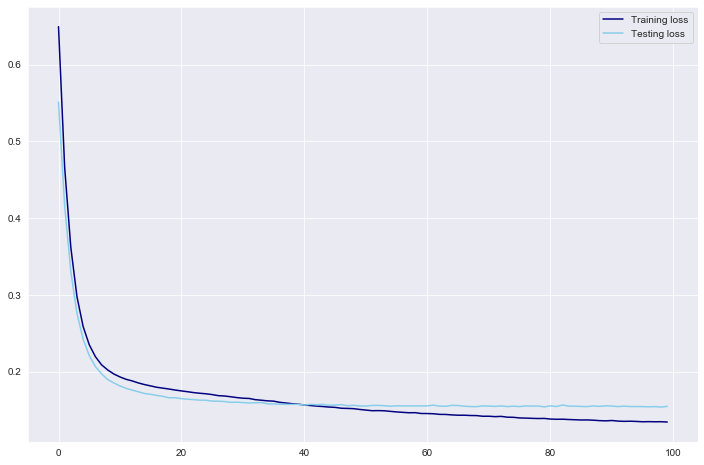

In [68]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

In [69]:
history.history['acc'][-1], history.history['val_acc'][-1]

(0.944906, 0.9462647438049316)

__Using Regularization Method 1: L1 and L2__

In [70]:
from keras import regularizers

model_l2 = Sequential()

n_input = X_train_sc.shape[1]

model_l2.add(Dense(
    18,
    input_dim=n_input,
    activation='relu',
    kernel_regularizer=regularizers.l2(0.01)
))

model_l2.add(Dense(
    9,
    activation='relu',
    kernel_regularizer=regularizers.l2(0.01)
))

model_l2.add(Dense(
    1,
    activation='sigmoid',
    kernel_regularizer=regularizers.l2(0.01)
))

model_l2.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

history_l2 = model_l2.fit(
    X_train_sc,
    y_train,
    validation_data=(X_test_nn, y_test),
    epochs=100,
    batch_size=None
)

Train on 2287 samples, validate on 763 samples
Epoch 1/100
2287/2287 [==============================] - 0s 133us/step - loss: 0.7770 - acc: 0.7118 - val_loss: 0.6532 - val_acc: 0.8506
Epoch 2/100
2287/2287 [==============================] - 0s 54us/step - loss: 0.5808 - acc: 0.8780 - val_loss: 0.5149 - val_acc: 0.9161
Epoch 3/100
2287/2287 [==============================] - 0s 57us/step - loss: 0.4758 - acc: 0.9125 - val_loss: 0.4318 - val_acc: 0.9292
Epoch 4/100
2287/2287 [==============================] - 0s 61us/step - loss: 0.4155 - acc: 0.9217 - val_loss: 0.3854 - val_acc: 0.9423
Epoch 5/100
2287/2287 [==============================] - 0s 59us/step - loss: 0.3804 - acc: 0.9300 - val_loss: 0.3580 - val_acc: 0.9410
Epoch 6/100
2287/2287 [==============================] - 0s 63us/step - loss: 0.3579 - acc: 0.9344 - val_loss: 0.3389 - val_acc: 0.9450
Epoch 7/100
2287/2287 [==============================] - 0s 65us/step - loss: 0.3420 - acc: 0.9318 - val_loss: 0.3274 - val_acc: 0.9436


2287/2287 [==============================] - 0s 63us/step - loss: 0.2648 - acc: 0.9344 - val_loss: 0.2566 - val_acc: 0.9423
Epoch 61/100
2287/2287 [==============================] - 0s 52us/step - loss: 0.2636 - acc: 0.9379 - val_loss: 0.2579 - val_acc: 0.9410
Epoch 62/100
2287/2287 [==============================] - 0s 52us/step - loss: 0.2639 - acc: 0.9353 - val_loss: 0.2565 - val_acc: 0.9423
Epoch 63/100
2287/2287 [==============================] - 0s 50us/step - loss: 0.2638 - acc: 0.9357 - val_loss: 0.2558 - val_acc: 0.9423
Epoch 64/100
2287/2287 [==============================] - 0s 49us/step - loss: 0.2631 - acc: 0.9357 - val_loss: 0.2611 - val_acc: 0.9397
Epoch 65/100
2287/2287 [==============================] - 0s 48us/step - loss: 0.2638 - acc: 0.9357 - val_loss: 0.2565 - val_acc: 0.9423
Epoch 66/100
2287/2287 [==============================] - 0s 45us/step - loss: 0.2635 - acc: 0.9340 - val_loss: 0.2564 - val_acc: 0.9384
Epoch 67/100
2287/2287 [==============================

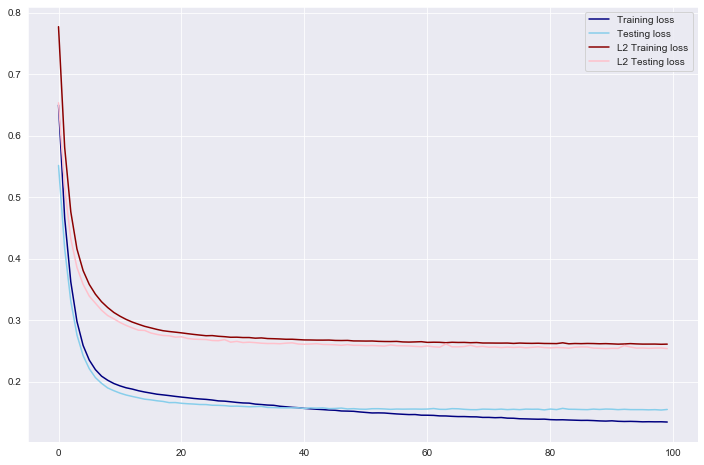

In [71]:
train_loss_l2 = history_l2.history['loss']
test_loss_l2 = history_l2.history['val_loss']
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.plot(train_loss_l2, label='L2 Training loss', color='darkred')
plt.plot(test_loss_l2, label='L2 Testing loss', color='pink')
plt.legend();

In [72]:
history_l2.history['acc'][-1], history_l2.history['val_acc'][-1]

(0.9344119, 0.9436435103416443)

# Model Selection and Evaluation 

**Model performance at a glance :**

**Baseline score = 0.67**

| Sl. No     | Classifier | Train Score | Test Score |
|------------|------------|-------------|------------|
|  1         | LogisticReg| 0.91        | 0.93       |
|  2         | KNN Model  | 0.99        | 0.96       |
|  3         | Rnd. Frst  | 0.00        | 0.00       |
|  4         | Extra Tree | 0.94        | 0.95       |
|  5         | Ada Boost  | 0.00        | 0.00       |
|  6         | Gradnt.Bst.| 0.00        | 0.00       |
|  5         | Votingclsfr| 0.00        | 0.00       |

KNN model produced 0.96 accuracy score - better than other machine models.

In [73]:
def c_confusion_matrix(y_true, y_pred):
    # handling data
    cm = confusion_matrix(y_true, y_pred)
    labels = y_true.unique()
    labels.sort()
    
    # plotting
    sns.set(font_scale=1.2)
    plt.figure(figsize=(10,4))
    
   
    
    sns.heatmap(cm, annot=True, fmt='g', cmap="BuPu",xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted Churned Tenants')
    plt.ylabel('True Churned Tenants')
    
    b, t = plt.ylim()
    b += 0.8
    t -= 0.8
    plt.ylim(b, t)
    

## Confusion Matrix

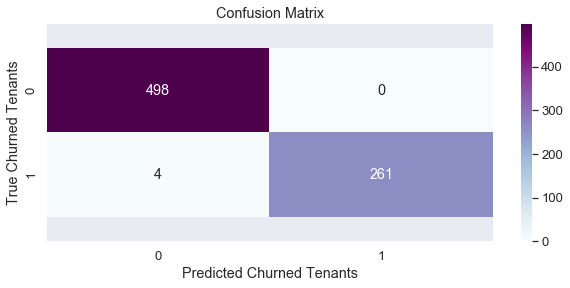

In [78]:
preds = kn1_model.predict(X_test)
c_confusion_matrix(y_test, preds)

 - The "1" which is 'Churned Tenant' category is predicted correctly => True positive score = 498
 - The "1" which is 'Churned Tenant' category is predicted incorrectly => False positive = 0
 - The "0" which is 'Current Tenant' category is predicted correctly => True negative = 261
 - The "0" which is 'Current Tenant' is predicted incorrectly => False positive = 4

## ROC AUC Curve

Receiver Operating Characteristic (ROC) Curve & Area under the ROC curve

I am using Receiver Operating Characteristic curve to visualize the overlap between my positive class and negative class by moving our classification threshold from 0 to 1.

I am using the area under the ROC curve (abbreviated ROC AUC or AUC ROC) to quantify the gap between our distributions.

In [79]:
pred_proba = [i[1] for i in et1_model.predict_proba(X_test)]
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

In [80]:
from sklearn.metrics import roc_auc_score
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

0.9992536182465712

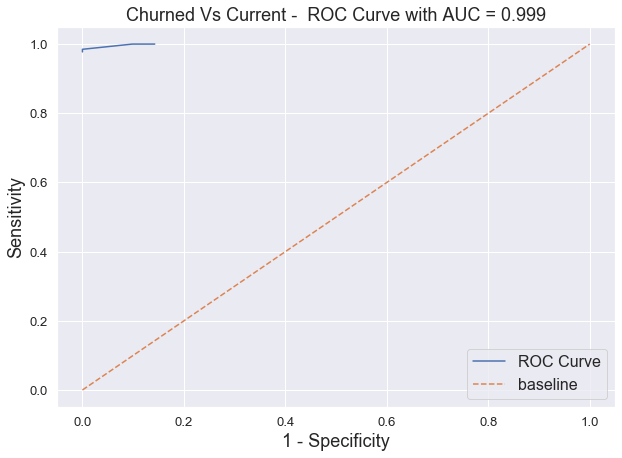

In [81]:
# Create figure.
plt.figure(figsize = (10,7))
# Create threshold values.
thresholds = np.linspace(0, 1, 200)
# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')
# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')
# Label axes.
plt.title(f'Churned Vs Current -  ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=18)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)
# Create legend.
plt.legend(fontsize=16);

__Interpreting ROC AUC__

**We have an ROC AUC of 0.90 which is less than we would have liked( Which is close to 1) .In otherwords in our Extra trees model model our Tenant churn (positive) and Current Tenants (negative) populations are 90% perfectly separated. Looking at our model we can conclude that our model has scope to improve and needs to get as close as to 1.**

## Feature Importance

In [82]:
# Best Estimator for GridSearch
gs_extra_trees.best_estimator_

Pipeline(memory=None,
         steps=[('extra_trees',
                 ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                      criterion='gini', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=300, n_jobs=None,
                                      oob_score=False, random_state=None,
                                      verbose=0, warm_start=False))],
         verbose=False)

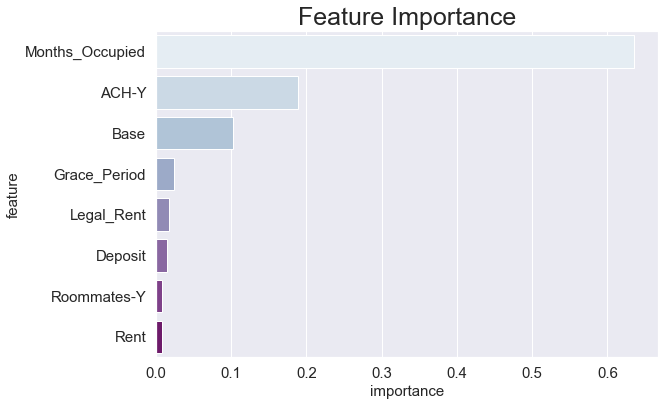

In [83]:
# getting the feature importances crom the model
feats =gs_extra_trees.best_estimator_.steps[0][1].feature_importances_
# getting keys of the test set
keys = X_test.keys()
# zipping the keys and feature importances
feat_import = pd.DataFrame(list(zip(keys, feats)),
                           columns=['feature', 'importance'])
# sorting the dataframe by importance
feat_import = feat_import.sort_values(by='importance', ascending=False)

# plotting importance
plt.figure(figsize=(9, 6))
plt.title('Feature Importance', fontsize=25)
sns.set_style("darkgrid")
sns.barplot(data=feat_import,
            x='importance',
            y='feature',
            orient='h',
            palette="BuPu")
plt.xlabel('importance', fontsize=15)
plt.ylabel('feature', fontsize=15)
plt.tick_params(labelsize=15)

## Model Coeficients

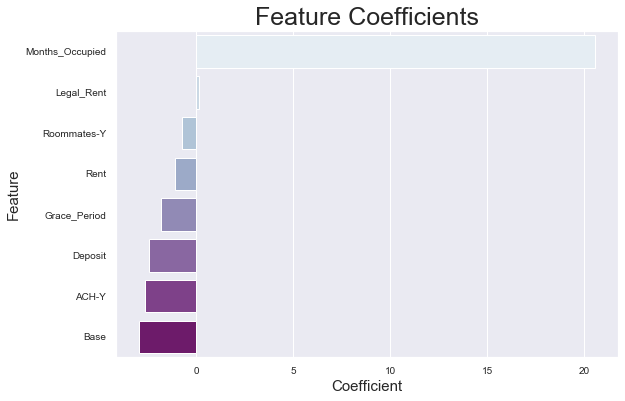

In [85]:
# getting the feature coefficiants crom the Logistic Regression model
coefs = gs_log.best_estimator_.steps[1][1].coef_
# getting keys of the test set
keys = X_test.keys()
# zipping the keys and feature importances
feat_coef = pd.DataFrame(list(zip(keys, coefs[0])),
                         columns=['feature', 'coefficient'])
# sorting the dataframe by coefficients
feat_coef = feat_coef.sort_values(by='coefficient', ascending=False)

# plotting coefficients
plt.figure(figsize=(9, 6))
plt.title('Feature Coefficients', fontsize=25)
sns.set_style("darkgrid")
sns.barplot(data=feat_coef,
            x='coefficient',
            y='feature',
            orient='h',
            palette="BuPu")
plt.xlabel('Coefficient', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.tick_params(labelsize=10)

## Conclusion

With help of availabel data from Kaggle, public real estate data and population mapped to cesnsus tracts I was able to predict informal settlements in Sao Paulo. During the modeling process we found that few features have high (Positive and Negative) coffecients with the presence of a informal settlements. __Apartment listing distance__ was a great indicator in our models. One of the __unusual findings__ is that the __price__ of real estate listings and __quantity__ of the listings didn't have much impact.

One of the limitation I found in our best performing model the Extra Tree Modelis that the Train and Test scores always performed much better than the cross val score on the original dataset. Even after trying with different Random State I couldn't improve the Cross Val scores on the Original data set. This needs further investigation. 

This model with data from public real estate data and population mapped to cesnsus tracts can be used in other cities if we can get an accurate data from the respective agencies. The model would be best fit for North and South American countries.  

### Recommendations and furthur plans

As noted in the conclusion, we recommend using different models for different regions. While this model works well for the city we tested in on, it may not work well in less urban environments where informal settlements may be constructed.

This method isn't perfect, and will likely work best when used in conjunction with other methods of detecting informal settlements using satellite data. A combination of the two would likely yield better results than these models alone.

One limitation is that very small favelas will mark an entire census tract as having an informal settlement within it. Future iterations may want to limit the number of small informal settlements included in the model.

Future versions may also want to avoid using census tracts as a geographical unit as they tend to have unusual shapes. Other methods should be considered for geographical mapping.

### Production Pipeline

Since our model prototype has been established that surpassed the desired performance thresholds, it is ready for the production line. 

These are the thoughts for a production line can be thought of as the following:

 - Data injection from a data warehouse (In this case from Voyager - Business Application)

 - Model training update 

 - Test and report the most recent model performance to the stakeholders

 - Loading the flagged users (potential churners) back to the database

While  what should be done with the users that are churn-tagged remains an open question to product owners. A scientific approach is to run A/B tests on various segments of churners, optimize for a product, and experience change that increases user retention.